# <span style = "color: green">July 17 Python </span>

### Ingest Data

In [1]:
import pandas as pd

In [2]:
robots_df = pd.read_csv("robots.csv")

In [3]:
fights_df = pd.read_csv("fights.csv")

In [4]:
teams_df = pd.read_csv("teams.csv")

In [5]:
tournaments_df = pd.read_csv("tournament_earnings.csv")

In [6]:
print("robots")
display(robots_df)
print("fights")
display(fights_df)
print("teams")
display(teams_df)
print("tour")
display(tournaments_df)

robots


,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,TitanFist,Heavyweight,1,95,88
1,102,MechaRex,Lightweight,2,75,65
2,103,VoltStriker,Middleweight,3,85,78
3,104,IronClaw,Heavyweight,1,92,90
4,105,ShadowViper,Lightweight,2,78,72


fights


,fight_id,winner_id,loser_id,damage_dealt,fight_duration_sec
0,201,101,103,56,120
1,202,102,105,40,98
2,203,103,102,48,110
3,204,101,104,72,150
4,205,105,102,38,85


teams


,team_id,team_name,lead_engineer,founded_year,headquarters
0,1,Steel Titans,Dr. Nova,2020,Neo Tokyo
1,2,Cyber Warriors,Prof. Kline,2018,Silicon Valley
2,3,Mecha Masters,Eng. Orion,2019,Berlin


tour


,robot_id,tournament,earnings
0,101,Steel Showdown,"$5,000"
1,102,Cyber Clash,"$2,500"
2,103,Mech Madness,"$3,200"
3,104,Steel Showdown,"$4,100"
4,105,Cyber Clash,"$2,800"
5,105,Hardware Defiance,"$1,800"
6,103,Hardware Defiance,"$3,200"


In [7]:
strong_robots = robots_df[robots_df.attack_power > 85]

In [8]:
strong_robots

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,TitanFist,Heavyweight,1,95,88
3,104,IronClaw,Heavyweight,1,92,90


In [9]:
robots_df.attack_power >85

0     True
1    False
2    False
3     True
4    False
Name: attack_power, dtype: bool

In [11]:
strong_robots = robots_df[robots_df.attack_power > 85][['robot_id','attack_power']]

In [12]:
strong_robots

,robot_id,attack_power
0,101,95
3,104,92


# IL and IC i lock and lock

In [13]:
robots_df.dtypes

robot_id           int64
robot_name        object
weight_class      object
team_id            int64
attack_power       int64
defense_rating     int64
dtype: object

In [14]:
fights_df.dtypes

fight_id              int64
winner_id             int64
loser_id              int64
damage_dealt          int64
fight_duration_sec    int64
dtype: object

In [15]:
teams_df.dtypes

team_id           int64
team_name        object
lead_engineer    object
founded_year      int64
headquarters     object
dtype: object

In [16]:
tournaments_df.dtypes

robot_id       int64
tournament    object
earnings      object
dtype: object

### stat operations in describe, executable function

In [17]:
robots_df.describe()

,robot_id,team_id,attack_power,defense_rating
count,5.000000,5.00000,5.000000,5.000000
mean,103.000000,1.80000,85.000000,78.600000
std,1.581139,0.83666,8.631338,10.573552
min,101.000000,1.00000,75.000000,65.000000
25%,102.000000,1.00000,78.000000,72.000000
50%,103.000000,2.00000,85.000000,78.000000
75%,104.000000,2.00000,92.000000,88.000000
max,105.000000,3.00000,95.000000,90.000000


### change datatypes

In [19]:
robots_df.robot_name = robots_df.robot_name.astype('string')

In [20]:
robots_df.dtypes

robot_id                   int64
robot_name        string[python]
weight_class              object
team_id                    int64
attack_power               int64
defense_rating             int64
dtype: object

### how many won - group by function

In [21]:
fights_df

,fight_id,winner_id,loser_id,damage_dealt,fight_duration_sec
0,201,101,103,56,120
1,202,102,105,40,98
2,203,103,102,48,110
3,204,101,104,72,150
4,205,105,102,38,85


In [22]:
winners_count = fights_df.groupby("winner_id")

In [23]:
winners_count

In [28]:
winners_count = fights_df.groupby("winner_id", as_index=False)['fight_id'].count()

In [31]:
winners_count

,winner_id,fight_id
0,101,2
1,102,1
2,103,1
3,105,1


### series

In [32]:
winners_count = fights_df.groupby("winner_id")['fight_id'].count()
winners_count

winner_id
101    2
102    1
103    1
105    1
Name: fight_id, dtype: int64

In [36]:
#this is the count that robots have won
winners_count = fights_df.groupby("winner_id", as_index=False)['fight_id'].count()
winners_count.columns = ["robot_id", "fights_won"]
winners_count

,robot_id,fights_won
0,101,2
1,102,1
2,103,1
3,105,1


In [39]:
losers_count = fights_df.groupby("loser_id")['fight_id'].count().reset_index()
losers_count.columns = ["robot_id", "fights_lost"]
losers_count

,robot_id,fights_lost
0,102,2
1,103,1
2,104,1
3,105,1


In [42]:
win_loss_stats = pd.merge(winners_count,losers_count, on ="robot_id", how = "outer")
win_loss_stats

,robot_id,fights_won,fights_lost
0,101,2.0,NaN
1,102,1.0,2.0
2,103,1.0,1.0
3,104,NaN,1.0
4,105,1.0,1.0


In [44]:
# fill null values
win_loss_stats.fillna(0)

,robot_id,fights_won,fights_lost
0,101,2.0,0.0
1,102,1.0,2.0
2,103,1.0,1.0
3,104,0.0,1.0
4,105,1.0,1.0


In [45]:
win_loss_stats.sort_values(by=["fights_won"],ascending=False)

,robot_id,fights_won,fights_lost
0,101,2.0,NaN
1,102,1.0,2.0
2,103,1.0,1.0
4,105,1.0,1.0
3,104,NaN,1.0


In [46]:
tournaments_df

,robot_id,tournament,earnings
0,101,Steel Showdown,"$5,000"
1,102,Cyber Clash,"$2,500"
2,103,Mech Madness,"$3,200"
3,104,Steel Showdown,"$4,100"
4,105,Cyber Clash,"$2,800"
5,105,Hardware Defiance,"$1,800"
6,103,Hardware Defiance,"$3,200"


In [47]:
robots_earning_df = pd.merge(robots_df, tournaments_df, on = "robot_id", how = "inner")

In [48]:
robots_earning_df

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating,tournament,earnings
0,101,TitanFist,Heavyweight,1,95,88,Steel Showdown,"$5,000"
1,102,MechaRex,Lightweight,2,75,65,Cyber Clash,"$2,500"
2,103,VoltStriker,Middleweight,3,85,78,Mech Madness,"$3,200"
3,103,VoltStriker,Middleweight,3,85,78,Hardware Defiance,"$3,200"
4,104,IronClaw,Heavyweight,1,92,90,Steel Showdown,"$4,100"
5,105,ShadowViper,Lightweight,2,78,72,Cyber Clash,"$2,800"
6,105,ShadowViper,Lightweight,2,78,72,Hardware Defiance,"$1,800"


In [49]:
robots_earning_df.dtypes

robot_id                   int64
robot_name        string[python]
weight_class              object
team_id                    int64
attack_power               int64
defense_rating             int64
tournament                object
earnings                  object
dtype: object

In [56]:
robots_earning_df["earnings"] = robots_earning_df["earnings"].str.replace(r'[$\,]', '', regex=True).astype(int)

In [57]:
robots_earning_df

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating,tournament,earnings
0,101,TitanFist,Heavyweight,1,95,88,Steel Showdown,5000
1,102,MechaRex,Lightweight,2,75,65,Cyber Clash,2500
2,103,VoltStriker,Middleweight,3,85,78,Mech Madness,3200
3,103,VoltStriker,Middleweight,3,85,78,Hardware Defiance,3200
4,104,IronClaw,Heavyweight,1,92,90,Steel Showdown,4100
5,105,ShadowViper,Lightweight,2,78,72,Cyber Clash,2800
6,105,ShadowViper,Lightweight,2,78,72,Hardware Defiance,1800


In [58]:
robots_earning_df.dtypes

robot_id                   int64
robot_name        string[python]
weight_class              object
team_id                    int64
attack_power               int64
defense_rating             int64
tournament                object
earnings                   int32
dtype: object

In [63]:
total_robot_earnings_df = robots_earning_df.groupby("robot_id").agg(
    total_robot_earnings = ("earnings", "sum"),
    team_id = ("team_id", "first")
).reset_index()
total_robot_earnings_df

,robot_id,total_robot_earnings,team_id
0,101,5000,1
1,102,2500,2
2,103,6400,3
3,104,4100,1
4,105,4600,2


In [64]:
total_robot_earnings_df["total_team_earnings"] = total_robot_earnings_df.groupby("team_id")["total_robot_earnings"].sum()

In [65]:
total_robot_earnings_df

,robot_id,total_robot_earnings,team_id,total_team_earnings
0,101,5000,1,NaN
1,102,2500,2,9100.0
2,103,6400,3,7100.0
3,104,4100,1,6400.0
4,105,4600,2,NaN


In [66]:
total_robot_earnings_df.fillna(0)

,robot_id,total_robot_earnings,team_id,total_team_earnings
0,101,5000,1,0.0
1,102,2500,2,9100.0
2,103,6400,3,7100.0
3,104,4100,1,6400.0
4,105,4600,2,0.0


In [69]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

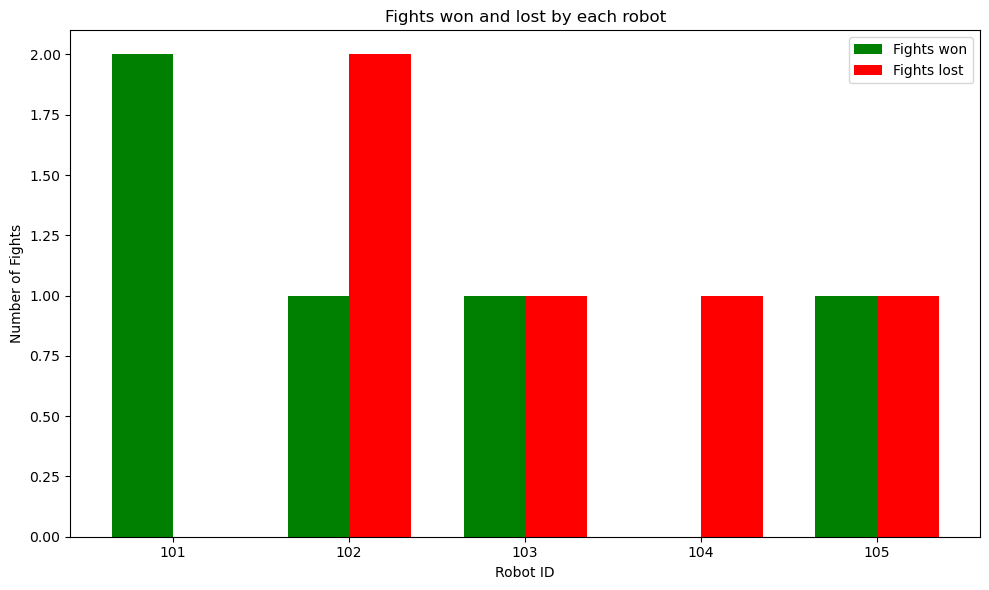

In [79]:
# create bar chart
plt.figure(figsize=(10,6))
bar_width = .35

x=range(len(win_loss_stats))
x

#plot wins and losses  side by side

plt.bar(x,win_loss_stats["fights_won"], width = bar_width, label="Fights won", color = "green")
plt.bar([i+bar_width for i in x], win_loss_stats["fights_lost"], width = bar_width, label="Fights lost", color = "red")

#set x-ticks and labels

plt.xlabel("Robot ID")
plt.ylabel("Number of Fights")
plt.title("Fights won and lost by each robot")
plt.xticks([i + bar_width/ 2 for i in x], win_loss_stats["robot_id"])
plt.legend()
plt.tight_layout()

plt.show